In [34]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [2]:
dfv = pd.read_csv('../Data/training_variants')

In [3]:
dft = pd.read_csv("../Data/training_text",sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [4]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
dfv.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [55]:
dfv.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
dft.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
mystring = dft.iloc[0,1]+dft.iloc[1,1]+dft.iloc[2,1]

In [9]:
len(set(mystring.split()))

3307

In [10]:
df = pd.merge(dfv,dft,how = "inner", on = 'ID')

In [11]:
df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
Text         3321 non-null object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [13]:
df_small = df.iloc[:10,:]

In [14]:
df_small

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [56]:
pd.to_pickle(df_small, '../Data/sample.pkl')

In [16]:
dft.iloc[1,1]

" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n\u200a=\u200a8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using selec

In [18]:
df.Gene.value_counts()

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
FGFR3      39
MLH1       35
JAK2       33
SMAD4      33
MET        33
NOTCH1     31
AKT1       28
ABL1       26
ROS1       26
PTPN11     26
         ... 
TCF3        1
IKZF1       1
PIK3R3      1
CDKN2C      1
VEGFA       1
MYOD1       1
PPM1D       1
SRSF2       1
FAM58A      1
PMS1        1
SHOC2       1
AURKB       1
KLF4        1
MEN1        1
ARID1A      1
CEBPA       1
RRAS2       1
INPP4B      1
FGF4        1
KMT2B       1
FGF19       1
BARD1       1
HLA-B       1
SDHC        1
EPCAM       1
CCND2       1
GLI1        1
RICTOR      1
MDM4        1
MDM2        1
Name: Gene, dtype: int64

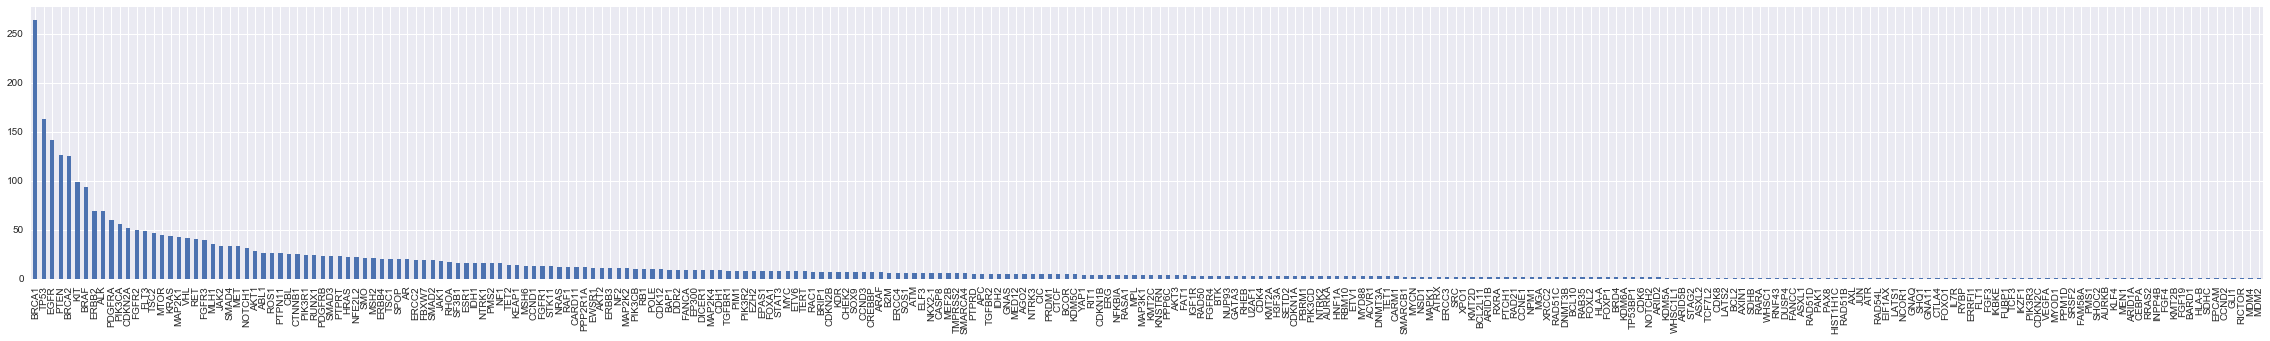

In [40]:
df.Gene.value_counts().plot(kind='bar', figsize = (40,5))

In [43]:
df[df.Gene == "BRCA1"].Class.value_counts()

5    90
1    60
6    53
4    46
3    15
Name: Class, dtype: int64

In [52]:
df[df.Class == 7].iloc[1,4]

"Sequencing studies have identified many recurrent coding mutations in human cancer genes; however, highly recurrent mutations involving regulatory regions have rarely been observed. Here we describe two independent mutations within the TERT core promoter that, when taken together, were observed in 71% (50 of 70) of melanomas and generate de novo consensus ETS binding motifs. Reporter assays showed that these mutations increase transcriptional activity from the TERT promoter by 2–4-fold. Examination of cancer cell lines derived from diverse tumor types revealed the same mutations in 16% (24 of 150) of cases, with preliminary evidence of elevated frequency in bladder and hepatocellular cancer cells. Thus, somatic mutations in regulatory regions of the genome may represent an important tumorigenic mechanism.  Systematic characterization of human cancer genomes has led to the discovery of a wide range of mutated genes that contribute to tumor development and progression. Most of the somat